In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
game_df = pd.read_csv("2024-03-06 Listing Data.csv")

,GAME_ID,GAME_DATE,GAME_TIME,SEASON_ID,SEASON_STAGE,VISITOR_TEAM_TRI_CODE,HOME_TEAM_TRI_CODE,SECTION_CATEGORY,SECTION_GROUP,SECTION_LEVEL,SECTION_NAME,ROW_NAME,SEAT_NAME,SECTION_ROW_SEAT_NAME,TICKET_LISTING_PRICE,DAYS_INVENTORY_LEAD_TIME,INVENTORY_LEAD_TIME_CATEGORY
0,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 104,ROW 16,SEAT 11,SECTION 104 - ROW 16 - SEAT 11,613.0,0.0,EVENT DAY
127,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 104,ROW 16,SEAT 11,SECTION 104 - ROW 16 - SEAT 11,564.0,0.0,EVENT DAY
6395,22200026,2022-10-21,19:00:00,2022,REGULAR SEASON,DEN,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 104,ROW 16,SEAT 11,SECTION 104 - ROW 16 - SEAT 11,351.0,0.0,EVENT DAY
18149,22200068,2022-10-27,19:00:00,2022,REGULAR SEASON,MIA,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 104,ROW 16,SEAT 11,SECTION 104 - ROW 16 - SEAT 11,449.0,2.0,EVENT WEEK
23268,22200156,2022-11-07,19:00:00,2022,REGULAR SEASON,SAC,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 104,ROW 16,SEAT 11,SECTION 104 - ROW 16 - SEAT 11,250.0,0.0,EVENT DAY


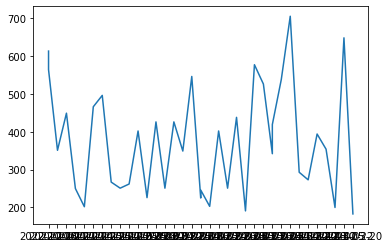

In [4]:
sub_df = game_df[game_df["SECTION_ROW_SEAT_NAME"] == "SECTION 104 - ROW 16 - SEAT 11"]
plt.plot(sub_df["GAME_DATE"], sub_df["TICKET_LISTING_PRICE"])
sub_df.head(5)

In [5]:
seat_coords = pd.read_csv("2024-03-06 Seat Coordinates.csv")
seat_coords

,HOME_TEAM_TRI_CODE,SECTION_ROW_SEAT_NAME,SEAT_CENTER_X,SEAT_CENTER_Y
0,GSW,BALCONY 1 - ROW 01 - SEAT 1,134,2220
1,GSW,BALCONY 1 - ROW 01 - SEAT 2,134,2244
2,GSW,BALCONY 1 - ROW 01 - SEAT 3,134,2268
3,GSW,BALCONY 1 - ROW 01 - SEAT 4,134,2292
4,GSW,BALCONY 2 - ROW 01 - SEAT 1,134,2796
...,...,...,...,...
15223,GSW,SUITE VIP - ROW BB - SEAT 95,2032,2120
15224,GSW,SUITE VIP - ROW BB - SEAT 96,2016,2120
15225,GSW,SUITE VIP - ROW BB - SEAT 97,2000,2120
15226,GSW,SUITE VIP - ROW BB - SEAT 98,1984,2120


In [6]:
merged_df = pd.merge(game_df, seat_coords[['SECTION_ROW_SEAT_NAME', 'SEAT_CENTER_X', 'SEAT_CENTER_Y']], on=['SECTION_ROW_SEAT_NAME'], how='left')


In [7]:
merged_df.head(5)

,GAME_ID,GAME_DATE,GAME_TIME,SEASON_ID,SEASON_STAGE,VISITOR_TEAM_TRI_CODE,HOME_TEAM_TRI_CODE,SECTION_CATEGORY,SECTION_GROUP,SECTION_LEVEL,SECTION_NAME,ROW_NAME,SEAT_NAME,SECTION_ROW_SEAT_NAME,TICKET_LISTING_PRICE,DAYS_INVENTORY_LEAD_TIME,INVENTORY_LEAD_TIME_CATEGORY,SEAT_CENTER_X,SEAT_CENTER_Y
0,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 104,ROW 16,SEAT 11,SECTION 104 - ROW 16 - SEAT 11,613.0,0.0,EVENT DAY,2674.0,3604.0
1,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 124,ROW 26,SEAT 2,SECTION 124 - ROW 26 - SEAT 2,480.0,0.0,EVENT DAY,1366.0,3577.0
2,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 124,ROW 20,SEAT 3,SECTION 124 - ROW 20 - SEAT 3,470.0,0.0,EVENT DAY,1446.0,3436.0
3,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 114,ROW 11,SEAT 8,SECTION 114 - ROW 11 - SEAT 8,595.0,0.0,EVENT DAY,2962.0,1522.0
4,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,NON-PREMIUM,UPPER BOWL,LEVEL 200,SECTION 221,ROW 21,SEAT 8,SECTION 221 - ROW 21 - SEAT 8,300.0,0.0,EVENT DAY,2146.0,548.0


In [8]:
df = pd.read_html("https://www.basketball-reference.com/boxscores/?month=10&day=28&year=2023")

In [9]:
eastern_conference = df[-2]
western_conference = df[-1]

In [10]:
western_conference

,Western Conference,W,L,W/L%,GB,PS/G,PA/G
0,Oklahoma City Thunder*,2,0,1.000,—,116.0,104.5
1,Dallas Mavericks*,2,0,1.000,—,125.5,119.5
2,New Orleans Pelicans*,2,0,1.000,—,103.5,95.5
3,Denver Nuggets*,2,0,1.000,—,113.5,105.5
4,Phoenix Suns*,2,1,0.667,0.5,109.7,102.7
5,Los Angeles Clippers*,1,1,0.500,1.0,120.5,115.5
6,Minnesota Timberwolves*,1,1,0.500,1.0,100.0,93.5
7,Sacramento Kings*,1,1,0.500,1.0,122.0,118.0
8,Golden State Warriors*,1,1,0.500,1.0,113.0,111.0
9,Los Angeles Lakers*,1,1,0.500,1.0,103.5,107.0


In [11]:
team_name_mapping = {
    'Atlanta Hawks': 'ATL',
    'Boston Celtics': 'BOS',
    'Brooklyn Nets': 'BKN',
    'Charlotte Hornets': 'CHA',
    'Chicago Bulls': 'CHI',
    'Cleveland Cavaliers': 'CLE',
    'Dallas Mavericks': 'DAL',
    'Denver Nuggets': 'DEN',
    'Detroit Pistons': 'DET',
    'Golden State Warriors': 'GSW',
    'Houston Rockets': 'HOU',
    'Indiana Pacers': 'IND',
    'Los Angeles Clippers': 'LAC',
    'Los Angeles Lakers': 'LAL',
    'Memphis Grizzlies': 'MEM',
    'Miami Heat': 'MIA',
    'Milwaukee Bucks': 'MIL',
    'Minnesota Timberwolves': 'MIN',
    'New Orleans Pelicans': 'NOP',
    'New York Knicks': 'NYK',
    'Oklahoma City Thunder': 'OKC',
    'Orlando Magic': 'ORL',
    'Philadelphia 76ers': 'PHI',
    'Phoenix Suns': 'PHX',
    'Portland Trail Blazers': 'POR',
    'Sacramento Kings': 'SAC',
    'San Antonio Spurs': 'SAS',
    'Toronto Raptors': 'TOR',
    'Utah Jazz': 'UTA',
    'Washington Wizards': 'WAS'
}

In [12]:
def get_full_team_name(abbreviation, team_name_mapping):
    # Reverse the team_name_mapping dictionary
    reverse_mapping = {v: k for k, v in team_name_mapping.items()}
    
    # Get the full team name
    full_team_name = reverse_mapping.get(abbreviation, abbreviation)  # If not found, return the abbreviation
    
    return full_team_name

In [18]:
def get_win_percentage(date, team1):
    
    result_df = pd.DataFrame(columns=['Date', 'Team', 'Win_Percentage'])

    # Define the start and end dates for scraping
    date = pd.Timestamp(date)

    # Generate the URL for the current date
    url = f"https://www.basketball-reference.com/boxscores/?month={date.month}&day={date.day}&year={date.year}"

    east_df = pd.read_html(url)[-2]
    east_df = east_df.rename(columns={'Eastern Conference': 'Team'})
    
    west_df = pd.read_html(url)[-1]
    west_df = west_df.rename(columns={'Western Conference': 'Team'})

    
    combined_df = pd.concat([east_df, west_df])
    combined_df = combined_df[['Team', 'W/L%']]
    combined_df['Team'] = combined_df['Team'].str.replace('*', '')
    teams_df = combined_df[combined_df['Team'].isin([team1])]
    teams_df['Date'] = date
    
    teams_df['Team'] = teams_df['Team'].map(team_name_mapping)

    
    return teams_df


In [19]:
get_win_percentage('2022-11-30', 'Los Angeles Lakers')

C:\Users\Darin\AppData\Local\Temp/ipykernel_36820/512694679.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined_df['Team'] = combined_df['Team'].str.replace('*', '')
C:\Users\Darin\AppData\Local\Temp/ipykernel_36820/512694679.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_df['Date'] = date
C:\Users\Darin\AppData\Local\Temp/ipykernel_36820/512694679.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Team,W/L%,Date
12,LAL,0.4,2022-11-30


In [27]:
def pull_win_percentages(game_df, team_name_mapping):
    
    for index, row in game_df.iterrows():
        date = row['GAME_DATE']
        visitor_team = row['VISITOR_TEAM_TRI_CODE']
        home_team = row['HOME_TEAM_TRI_CODE']
                
        home_team = get_full_team_name(home_team, team_name_mapping)

        visitor_team = get_full_team_name(visitor_team, team_name_mapping)


        
        visitor_win_percentage_df = get_win_percentage(date, visitor_team)
        home_win_percentage_df = get_win_percentage(date, home_team)
        time.sleep(0.2)
        
        
        
        print(date, visitor_win_percentage_df, home_win_percentage_df)

    return visitor_win_percentage_df, home_win_percentage_df

In [28]:
pull_win_percentages(merged_df.head(5), team_name_mapping)

HTTPError: HTTP Error 429: Too Many Requests

In [ ]:
merged_df = pd.merge(game_df, team_wl_df, how='left', left_on=['GAME_DATE', 'VISITOR_TEAM_TRI_CODE'], right_on=['Date', 'Team'])

# Append W/L% to the corresponding column based on the team abbreviation
merged_df['AWAY_TEAM_WL'] = merged_df['W/L%'].where(merged_df['VISITOR_TEAM_TRI_CODE'] == 'LAL', None)
merged_df['HOME_TEAM_WL'] = merged_df['W/L%'].where(merged_df['HOME_TEAM_TRI_CODE'] == 'LAL', None)

# Drop unnecessary columns
merged_df.drop(['Team', 'W/L%', 'Date'], axis=1, inplace=True)

print(merged_df)